In [444]:
# Import typical packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [445]:
# Split data for each phase of model
def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [446]:
# Standardize data to make sure mean is zero and variance equal to one
def standardize_data(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std

In [447]:
# Calculate Mean Squared Error
def MeanSquaredEr(y, y_hat):
    n = y_hat.shape[0]
    MSE = sum((y - y_hat)**2)/n
    return MSE

In [448]:
# Calculate output y from bias
def calc_y(W, x):
    y = sum(np.array([W*np.power(x, exp) for exp, W in enumerate(W)]))
    return y

In [449]:
# Base expression of all the derivatives of the base
def base(x, y, y_hat):
    n = x.shape[0]
    return (-2/n)*(y-y_hat)

In [450]:
# Calculate the gradient and determine weights and bias
def StochGrad(x, y, W, learning_rate, epoch):
    for it in range(epoch):
        y_hat = calc_y(W,x)
        gradient = np.zeros(0)
        for exp, w in enumerate(W):
            gradient = np.append(gradient,sum(np.power(x,exp)*base(x,y,y_hat)))
        W -= 0.01*gradient
    return W, y_hat

In [495]:
# Read the CSVs into pandas
smoking_df = pd.read_csv("C:\\Users\\Alex\\Documents\\GitHub\\Data-Analyst-Portfolio\\Smoking Rate V Life Expectancy\\Data\\smoking_rates.csv")
smoking_df = smoking_df.sort_values("Country",ascending=True)

life_expectancy_df = pd.read_csv("C:\\Users\\Alex\\Documents\\GitHub\\Data-Analyst-Portfolio\\Smoking Rate V Life Expectancy\\Data\\life_expectancy.csv")
life_expectancy_df = life_expectancy_df.sort_values("Country", ascending= True)

In [496]:
# Merge and drop extraneous columns
complete_df = smoking_df.merge(life_expectancy_df, how="inner", on="Country")
complete_df = complete_df.drop(columns= "Unnamed: 0")

In [497]:
complete_df

,Country,Subregion,Female Smoking Rate,Male Smoking Rate,Total Smoking Rate,Life Expectancy (Years)
0,Albania,Southern Europe,7.9,50.5,29.2,78.63
1,Algeria,Northern Africa,1.4,36.3,18.8,76.06
2,Andorra,Southern Europe,29.5,38.1,33.8,82.91
3,Argentina,South America,33.0,15.4,28.2,78.20
4,Armenia,Western Asia,1.6,51.8,26.7,75.00
...,...,...,...,...,...,...
136,Uzbekistan,Central Asia,43.0,1.3,23.3,74.28
137,Vanuatu,Melanesia,3.3,45.0,24.1,67.15
138,Yemen,Western Asia,46.0,9.3,32.5,66.24
139,Zambia,Eastern Africa,63.0,4.4,25.0,53.74


<AxesSubplot:xlabel='Total Smoking Rate', ylabel='Life Expectancy (Years)'>

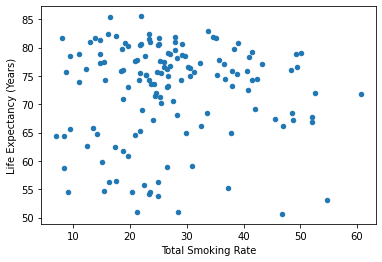

In [498]:
# Lets look at the relationships between each smoking rate and life expectancy
complete_df.plot.scatter("Total Smoking Rate","Life Expectancy (Years)")

In [499]:
# Shockingly, there doesn't seem to be a strong relationship between Life Expectancy of country 
# and Total Smoking Rate of each country.

<AxesSubplot:xlabel='Female Smoking Rate', ylabel='Life Expectancy (Years)'>

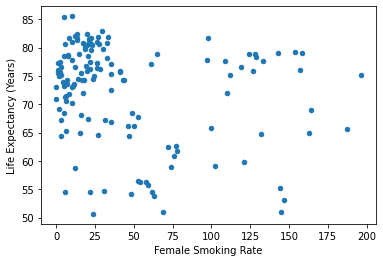

In [500]:
complete_df.plot.scatter("Female Smoking Rate","Life Expectancy (Years)")

In [501]:
# This seems to be the same with female smoking rate.

<AxesSubplot:xlabel='Male Smoking Rate', ylabel='Life Expectancy (Years)'>

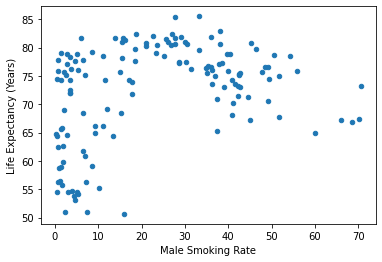

In [502]:
complete_df.plot.scatter("Male Smoking Rate","Life Expectancy (Years)")

In [503]:
# Here we see an interesting asymptotic relationship between Male Smoking Rate and a countries life expectancy. 

In [504]:
# Let's see if men make up the majority of smokers in the countries for our dataset.
mask = complete_df["Male Smoking Rate"] > complete_df["Female Smoking Rate"]
total_counter = mask.aggregate('count')
counter = complete_df[mask]
counter = counter["Male Smoking Rate"].aggregate('count')
per_maj_smok = (counter/total_counter)*100
per_maj_smok

53.90070921985816

In [505]:
# Another interesting metric to look at is the average difference between the male and female smoking rate
complete_df["Gender Difference"] = complete_df["Male Smoking Rate"] - complete_df["Female Smoking Rate"]
mask = complete_df["Gender Difference"] > 0
m_df = complete_df[mask]
m_df["Gender Difference"].mean()

20.96578947368421

In [599]:
# Despite there being a majority, I don't think it's enough to describe such a clear relationship.

In [600]:
# Let's see if we can use polynomial regression to find a curve

In [616]:
# Because I can only identify two potential inflection points on this curve
# I believe it can be modeled using a 3rd degree polynomial
degree = 3

In [617]:
# Randomize dataset for training.
complete_df =complete_df.sample(frac=1, replace = False, random_state = 1).reset_index(drop = True)

In [618]:
# Get numeric values for each variable
x = complete_df["Male Smoking Rate"].values
y = complete_df['Life Expectancy (Years)'].values

In [619]:
# Define training, validation, and test size
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [620]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=x, y=y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
# Gprint (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (98,), y_train: (98,)
X_val: (21,), y_val: (21,)


In [621]:
# Get standard deviation and mean of the training data
y_std = np.std(y_train)
y_mean = np.mean(y_train)

x_std = np.std(X_train)
x_mean = np.mean(X_train)

In [622]:
# Get split X and Y 
X_train = standardize_data(X_train)
X_val = standardize_data(X_val)
X_test = standardize_data(X_test)

y_train = standardize_data(y_train)
y_val = standardize_data(y_val)
y_test = standardize_data(y_test)

In [623]:
# Initialize Weights
# Generate random weights for coefficients 
W_o = np.array([np.random.random() for co in range(degree+1)])
W_o

array([0.78092543, 0.3254414 , 0.56308262, 0.39568903])

In [624]:
# Perform Stochastic Gradient Descent and get output y and weights
W_f, pred_y_hat = StochGrad(x=X_train, y=y_train, W=W_o, learning_rate = 0.1, epoch= 100)
W_f, pred_y_hat

(array([ 0.33620763,  0.46116864, -0.39027773,  0.03360108]),
 array([ 0.30345753,  0.34282269,  0.43237969,  0.4794419 , -0.36714442,
        -0.62618725, -0.81518222,  0.42977666, -0.12419728,  0.47931403,
         0.47960699, -0.79063652,  0.06577757, -0.7185856 , -0.80697083,
        -0.45109293, -0.84832339, -0.63372808,  0.04808267,  0.47881853,
         0.32867984,  0.09577778, -0.81518222, -0.89041733,  0.3354645 ,
        -0.63372808,  0.41055214,  0.47236348,  0.44326605,  0.18581706,
        -0.14044643, -0.89041733, -0.73439203, -0.57420551,  0.47881853,
         0.08307057, -0.85668274,  0.31283377,  0.07013842, -0.89892543,
         0.45583377, -0.67186502, -0.70289579,  0.40177603,  0.42845026,
        -0.55235665, -0.55961109, -0.77441995,  0.24511901,  0.12335638,
        -0.29132795,  0.37182567,  0.19661016, -0.69509454, -0.42661407,
         0.47732671, -0.09240929,  0.47981145,  0.45656503,  0.43491616,
        -0.29749539,  0.47572126,  0.42490908,  0.31283377,  0

In [625]:
# Calculate the ouput test set
test_y_hat = calc_y(W_f,X_test)

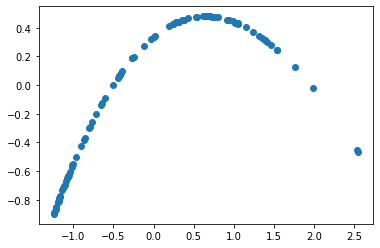

In [626]:
# Let's see how well it fitted the data
plt.scatter(X_train, pred_y_hat)

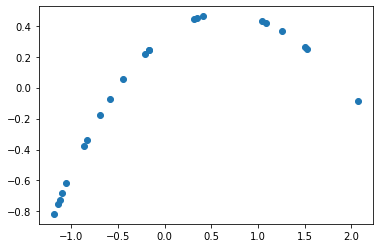

In [627]:
# And how well it fits the test data as well
plt.scatter(X_test, test_y_hat)

In [628]:
# Measure the MSE error and how well it fits the data.
train_err = MeanSquaredEr(pred_y_hat, y_train)
test_err = MeanSquaredEr(test_y_hat, y_test)
train_r2 = r2_score(y_train, pred_y_hat)
test_r2 = r2_score(y_test, test_y_hat)
print(f"Training Error: {round(train_err,3)}, Test Error: {round(test_err,3)}, Training R\u00b2: {round(train_r2,3)}, Test R\u00b2: {round(test_r2,3)}")

Training Error: 0.645, Test Error: 0.674, Training R²: 0.355, Test R²: 0.326


In [629]:
# Unscale the the weights
W_unscaled = W_f[-(degree):] * (y_std/x_std)
W_unscaled = np.insert(W_unscaled,0,W_f[0] * y_std + y_mean - np.sum(W_unscaled*x_mean))

In [630]:
print(f"{W_unscaled[-1]}x\u00b3 {W_unscaled[-2]}x\u00b2 + {W_unscaled[-3]}x + {W_unscaled[0]}")

0.01611248160053063x³ -0.18714702119605783x² + 0.22114082188246678x + 74.30525016754287


In [539]:
# After training this model and determining the equation that describes the behaivor of this graph,
# let's talk about the relationships displayed by our plot. 

# Interestingly enough, in the first portion of the graph it can be seen that the life expectancy exponentially increases
# amongst low smoking rates. This can be interpreted in multiple ways, but the peak of this graph is 
# right around 80 years of age and a male smoking rate of 20%. 

# Beyond this point we see an exponential drop in life expectancy as we get closer to the max male smoking rate of 70%.
# Here we see around a 25% reduction in life expectancy. 

# Based on these behaivors I'd be willing to make a few assumptions.
# The first is that developed countries probably make up a majority of these with a smoking rate of less than 20%.
# This would essentially mean that under this smoking rate of 20% that these countries see no difference in life expectancy 
# than they would otherwise expect given the state of public health, availability of healthcare, and other factors.
# The average life expectancy of developed countries is around 80% and this would more than likely explain this peak.
# After this you see the precipitous drop you would expect with increased smoking rates.

# Having all this in mind there are a few things to dimensionalize about this analysis. The major confounding factors that
# weren't standardized for this analysis are quality of healthcare, the effect of crime on the life expectancy of the country, 
# and how developed the country itself is. 